## TASK 1 - CORPUS

In [2]:
import pandas as pd
import numpy as np

In [22]:
#encodng the data into pandas.DataFrame objects

url_a_test = 'Data/arguments-test.tsv'
df_a_test = pd.read_csv(url_a_test, sep='\t')

url_a_training = 'Data/arguments-training.tsv'
df_a_training = pd.read_csv(url_a_training, sep='\t')

url_a_validation = 'Data/arguments-validation.tsv'
df_a_validation = pd.read_csv(url_a_validation, sep='\t')

url_l_test = 'Data/labels-test.tsv'
df_l_test = pd.read_csv(url_l_test, sep='\t')

url_l_training = 'Data/labels-training.tsv'
df_l_training = pd.read_csv(url_l_training, sep='\t')

url_l_validation = 'Data/labels-validation.tsv'
df_l_validation = pd.read_csv(url_l_validation, sep='\t')


In [64]:
#merge argument dataframes with label dataframes
df_test = pd.merge(df_a_test, df_l_test, on='Argument ID')

df_training = pd.merge(df_a_training, df_l_training, on='Argument ID')

df_validation = pd.merge(df_a_validation, df_l_validation, on='Argument ID')

In [65]:
#merge level 2 annotations to level 3 categories

df_test['Openess to change'] = df_test['Self-direction: thought'] | df_test['Self-direction: action'] | df_test['Stimulation'] | df_test['Hedonism'] 
df_test['Self-enhancement'] = df_test['Hedonism'] | df_test['Achievement'] | df_test['Power: dominance'] | df_test['Power: resources'] | df_test['Face']
df_test['Conservation'] = df_test['Face'] | df_test['Security: personal'] | df_test['Security: societal'] | df_test['Tradition'] | df_test['Conformity: rules'] | df_test['Conformity: interpersonal'] | df_test['Humility']
df_test['Self-transcendence'] = df_test['Humility'] | df_test['Benevolence: caring'] | df_test['Benevolence: dependability'] | df_test['Universalism: concern'] | df_test['Universalism: nature']| df_test['Universalism: tolerance'] | df_test['Universalism: objectivity']

df_training['Openess to change'] = df_training['Self-direction: thought'] | df_training['Self-direction: action'] | df_training['Stimulation'] | df_training['Hedonism']
df_training['Self-enhancement'] = df_training['Hedonism'] | df_training['Achievement'] | df_training['Power: dominance'] | df_training['Power: resources'] | df_training['Face']
df_training['Conservation'] = df_training['Face'] | df_training['Security: personal'] | df_training['Security: societal'] | df_training['Tradition'] | df_training['Conformity: rules'] | df_training['Conformity: interpersonal'] | df_training['Humility']
df_training['Self-transcendence'] = df_training['Humility'] | df_training['Benevolence: caring'] | df_training['Benevolence: dependability'] | df_training['Universalism: concern'] | df_training['Universalism: nature']| df_training['Universalism: tolerance'] | df_training['Universalism: objectivity']

df_validation['Openess to change'] = df_validation['Self-direction: thought'] | df_validation['Self-direction: action'] | df_validation['Stimulation'] | df_validation['Hedonism']
df_validation['Self-enhancement'] = df_validation['Hedonism'] | df_validation['Achievement'] | df_validation['Power: dominance'] | df_validation['Power: resources'] | df_validation['Face']
df_validation['Conservation'] = df_validation['Face'] | df_validation['Security: personal'] | df_validation['Security: societal'] | df_validation['Tradition'] | df_validation['Conformity: rules'] | df_validation['Conformity: interpersonal'] | df_validation['Humility']
df_validation['Self-transcendence'] = df_validation['Humility'] | df_validation['Benevolence: caring'] | df_validation['Benevolence: dependability'] | df_validation['Universalism: concern'] | df_validation['Universalism: nature']| df_validation['Universalism: tolerance'] | df_validation['Universalism: objectivity']

df_validation.head()

,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,...,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,Openess to change,Self-enhancement,Conservation,Self-transcendence
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,A01012,The use of public defenders should be mandatory,in favor of,the use of public defenders should be mandator...,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,A02001,Payday loans should be banned,in favor of,payday loans create a more impoverished societ...,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,A02002,Surrogacy should be banned,against,Surrogacy should not be banned as it is the wo...,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,A02009,Entrapment should be legalized,against,entrapment is gravely immoral and against huma...,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [66]:
#drop unuseful columns
df_test = df_test.drop(columns=['Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal', 'Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity'])
df_training = df_training.drop(columns=['Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal', 'Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity'])
df_validation = df_validation.drop(columns=['Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal', 'Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity'])

In [67]:
df_validation.head()

,Argument ID,Conclusion,Stance,Premise,Openess to change,Self-enhancement,Conservation,Self-transcendence
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,0,0,1,0
1,A01012,The use of public defenders should be mandatory,in favor of,the use of public defenders should be mandator...,0,0,0,1
2,A02001,Payday loans should be banned,in favor of,payday loans create a more impoverished societ...,0,0,1,1
3,A02002,Surrogacy should be banned,against,Surrogacy should not be banned as it is the wo...,1,0,0,0
4,A02009,Entrapment should be legalized,against,entrapment is gravely immoral and against huma...,0,0,1,1


### DATA EXPLORATION

Distribution of 'Stance' values among the data

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

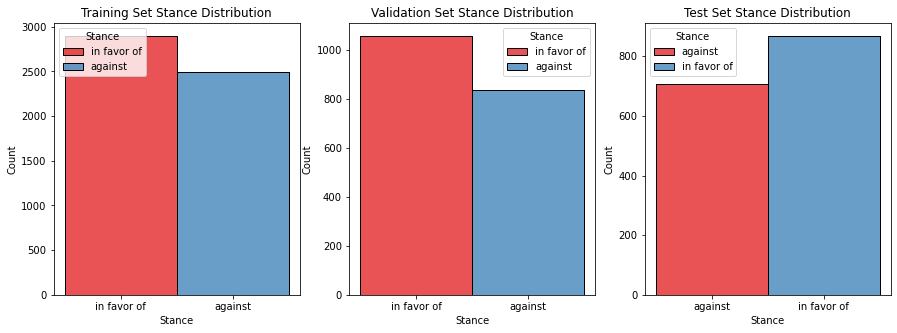

In [71]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Plot histogram for df_training
plt.subplot(1, 3, 1)
sns.histplot(df_training, x='Stance', hue='Stance', multiple='stack', palette='Set1')
plt.title('Training Set Stance Distribution')
plt.xlabel('Stance')
plt.ylabel('Count')

# Plot histogram for df_validation
plt.subplot(1, 3, 2)
sns.histplot(df_validation, x='Stance', hue='Stance', multiple='stack', palette='Set1')
plt.title('Validation Set Stance Distribution')
plt.xlabel('Stance')
plt.ylabel('Count')

# Plot histogram for df_test
plt.subplot(1, 3, 3)
sns.histplot(df_test, x='Stance', hue='Stance', multiple='stack', palette='Set1')
plt.title('Test Set Stance Distribution')
plt.xlabel('Stance')
plt.ylabel('Count');

This justifies the encoding of the 'Stance' column using One-Hot-Encoding 

In [78]:
df_training['Stance'].replace({'in favor of': 1, 'against': 0}, inplace=True)
df_validation['Stance'].replace({'in favor of': 1, 'against': 0}, inplace=True)
df_test['Stance'].replace({'in favor of': 1, 'against': 0}, inplace=True)

df_training['Stance'] = df_training['Stance'].astype(int)
df_validation['Stance'] = df_validation['Stance'].astype(int)
df_test['Stance'] = df_test['Stance'].astype(int)

df_training.head()

,Argument ID,Conclusion,Stance,Premise,Openess to change,Self-enhancement,Conservation,Self-transcendence
0,A01002,We should ban human cloning,1,we should ban human cloning as it will only ca...,0,0,1,0
1,A01005,We should ban fast food,1,fast food should be banned because it is reall...,0,0,1,0
2,A01006,We should end the use of economic sanctions,0,sometimes economic sanctions are the only thin...,0,1,1,0
3,A01007,We should abolish capital punishment,0,capital punishment is sometimes the only optio...,0,0,1,1
4,A01008,We should ban factory farming,0,factory farming allows for the production of c...,0,0,1,1


Distribution of Level 3 categories among the data

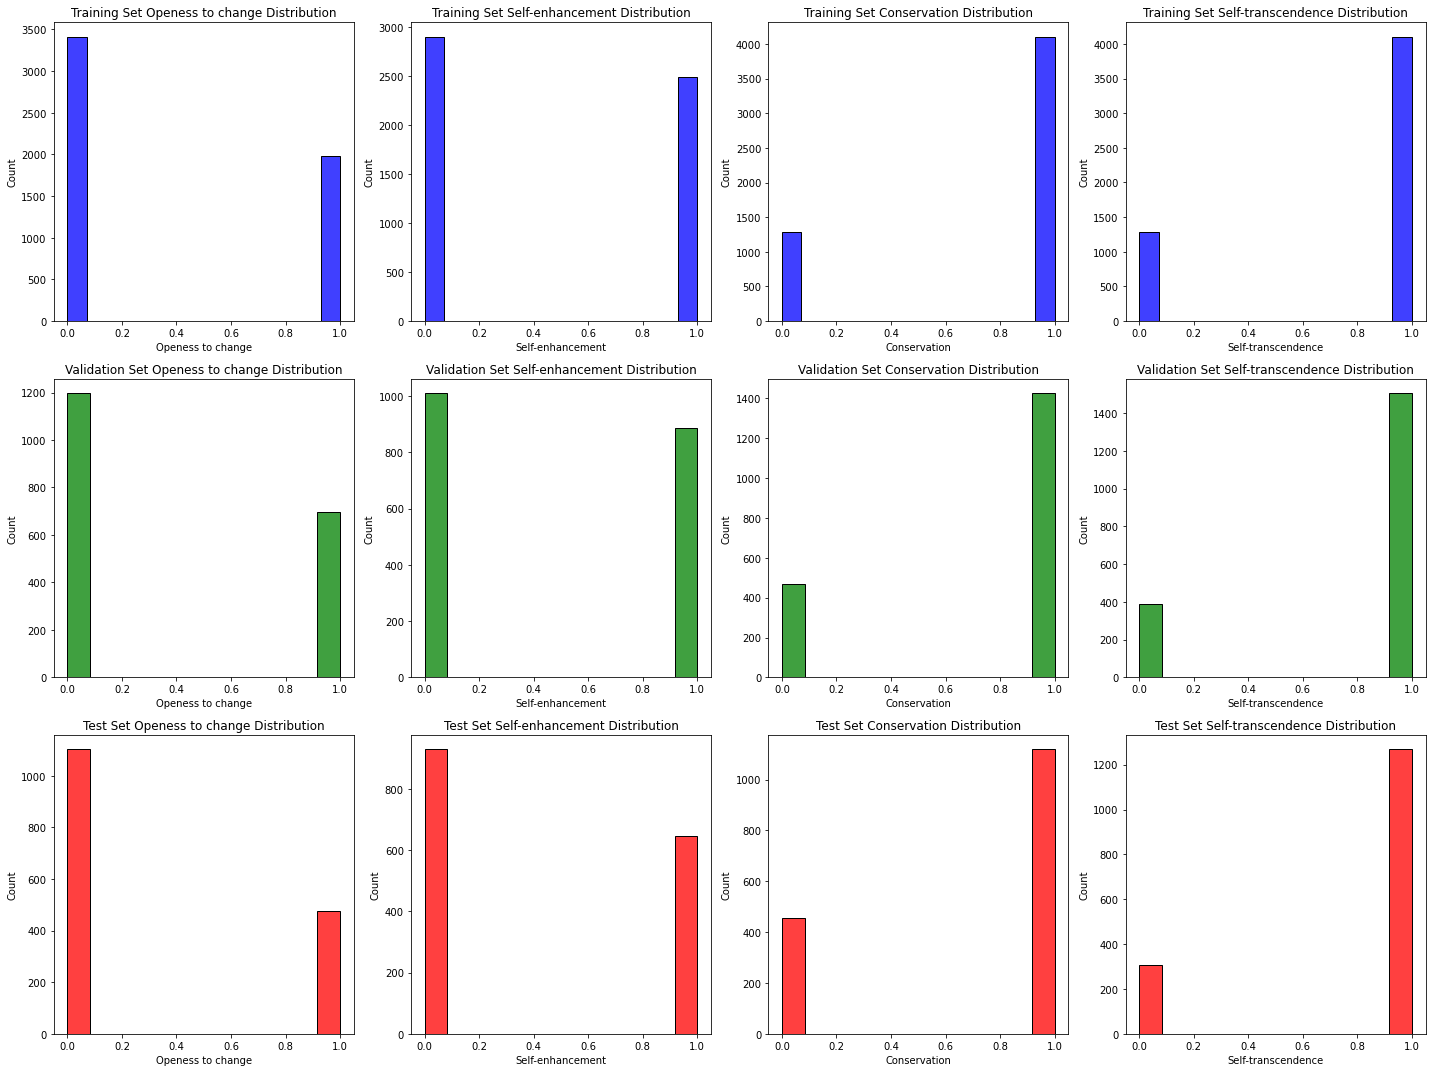

In [80]:
# Select the last four columns
columns_to_plot = df_training.columns[-4:]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot histograms for df_training
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_training[column], kde=False, color='blue')
    plt.title(f'Training Set {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')

# Plot histograms for df_validation
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 5)
    sns.histplot(df_validation[column], kde=False, color='green')
    plt.title(f'Validation Set {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')

# Plot histograms for df_test
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 9)
    sns.histplot(df_test[column], kde=False, color='red')
    plt.title(f'Test Set {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## TASK 2 - MODEL DEFINITION

In [85]:
#array of categories 
categories = ['Openess to change', 'Self-enhancement', 'Conservation', 'Self-transcendence']

#dictionary of classifiers
classifiers = {}

### Baseline models

In [86]:

def create_random_uniform_classifier(category):
    """
    Creates a random classifier predicting 0 or 1 with uniform probability.

    inputs:
        category: Category to predict
    outputs: 
        a function that generates random predictions
    """
    def random_uniform_classifier(size):
        """
        Generates random uniform predictions for the given category.

        inputs: 
            size: number of predictions to generate
        outputs: 
            array of random uniform predictions
        """
        return np.random.choice([0, 1], size=size)
    
    return random_uniform_classifier


In [87]:
def create_majority_classifier(category, majority_value):
    """
    Creates a majority classifier always predicting the most frequent valorization for the column.

    inputs:
        category: Category to predict
        majority_value: most frequent value (0 or 1)
    outputs:
        a function that generates majority predictions
    """
    def majority_classifier(size):
        """
        Generates majority predictions for the given category.

        inputs: 
            size: number of predictions to generate
        outputs: 
            array of majority predictions
        """
        return np.full(size, majority_value)
    
    return majority_classifier

In [88]:
#create classifiers for each category and save them in the dictionary
for category in categories:
    #random uniform classifier
    random_uniform_name = f'random_uniform_classifier_{category}'
    classifiers[random_uniform_name] = create_random_uniform_classifier(category)

    #majority classifier
    majority_name = f'majority_classifier_{category}'
    classifiers[majority_name] = create_majority_classifier(category, majority_value=1) #da capire perchè majority_value=1

In [89]:
print(classifiers)

{'random_uniform_classifier_Openess to change': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x0000018B222F49D0>, 'majority_classifier_Openess to change': <function create_majority_classifier.<locals>.majority_classifier at 0x0000018B222F4940>, 'random_uniform_classifier_Self-enhancement': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x0000018B2211A3A0>, 'majority_classifier_Self-enhancement': <function create_majority_classifier.<locals>.majority_classifier at 0x0000018B2211A310>, 'random_uniform_classifier_Conservation': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x0000018B2211A0D0>, 'majority_classifier_Conservation': <function create_majority_classifier.<locals>.majority_classifier at 0x0000018B2211A040>, 'random_uniform_classifier_Self-transcendence': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x0000018B2211A430>, 'majority_classifier_

In [90]:
#Applying the classifiers to the datasets

#iterating over the classifiers
for classifier_name, classifier in classifiers.items():
    #defining the category from the classifier name
    category = classifier_name.split('_')[-1]
    
    #applying the classifier to the test set
    predictions_training = classifier(size=len(df_training))
    prediciions_validation = classifier(size=len(df_validation))
    predictions_test = classifier(size=len(df_test))
    
    #saving the predictions in the test set
    df_training[f'predicted_{classifier_name}'] = predictions_training
    df_validation[f'predicted_{classifier_name}'] = prediciions_validation
    df_test[f'predicted_{classifier_name}'] = predictions_test

#saving the test set with the predictions
print(df_test)

     Argument ID                                         Conclusion  Stance  \
0         A26004                   We should end affirmative action       0   
1         A26010                   We should end affirmative action       1   
2         A26016                          We should ban naturopathy       1   
3         A26024                 We should prohibit women in combat       1   
4         A26026                          We should ban naturopathy       1   
...          ...                                                ...     ...   
1571      E07272             We should end mass migration together.       1   
1572      E07273             We should end mass migration together.       1   
1573      E07275  We should consider Russian interests in the EU...       1   
1574      E07280  We should adopt an extension of the applicatio...       1   
1575      E08023               We should abolish covid digital pass       0   

                                                Pre

### BERT models

In [36]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [18]:
#BERT w/C model creation
def create_bert_classifier(category):
    """
    Crea un classificatore basato su BERT per una categoria specifica.

    :param category: La categoria per cui creare il classificatore
    :return: Una funzione che utilizza BERT per classificare il testo
    """
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    def bert_classifier(texts):
        """
        Classifica i testi utilizzando il modello BERT.

        :param texts: Lista di testi da classificare
        :return: Array di previsioni
        """
        inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)
        return predictions.numpy()
    
    return bert_classifier


In [21]:
#BERT w/CP model creation 
def create_bert_classifier_with_premise(category):
    """
    Crea un classificatore basato su BERT per una categoria specifica utilizzando sia Conclusion che Premise.

    :param category: La categoria per cui creare il classificatore
    :return: Una funzione che utilizza BERT per classificare il testo
    """
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    def bert_classifier(conclusions, premises):
        """
        Classifica i testi utilizzando il modello BERT.

        :param conclusions: Lista di conclusioni da classificare
        :param premises: Lista di premesse da classificare
        :return: Array di previsioni
        """
        combined_texts = [f"{premise} [SEP] {conclusion}" for premise, conclusion in zip(premises, conclusions)]
        inputs = tokenizer(combined_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)
        return predictions.numpy()
    
    return bert_classifier

In [30]:
#BERT w/CPS model creation 
def create_bert_classifier_with_premise_and_stance(category):
    """
    Crea un classificatore basato su BERT per una categoria specifica utilizzando Conclusion, Premise e Stance.

    :param category: La categoria per cui creare il classificatore
    :return: Una funzione che utilizza BERT per classificare il testo
    """
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    def bert_classifier(conclusions, premises, stances):
        """
        Classifica i testi utilizzando il modello BERT.

        :param conclusions: Lista di conclusioni da classificare
        :param premises: Lista di premesse da classificare
        :param stances: Lista di stance (encoded in formato numerico) da classificare
        :return: Array di previsioni
        """
        combined_texts = [f"{premise} [SEP] {conclusion} [SEP] {stance}" for premise, conclusion, stance in zip(premises, conclusions, stances)]
        inputs = tokenizer(combined_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)
        return predictions.numpy()
    
    return bert_classifier


## TASK 3 - METRICS

In [32]:
from sklearn.metrics import f1_score

In [34]:
#defining per-category F1 score metric
def calculate_per_category_f1(y_true, y_pred, categories):
    category_f1_scores = {}
    for category in categories:
        # Filter true and predicted labels for the current category
        category_indices = [i for i, cat in enumerate(y_true['category']) if cat == category]
        category_y_true = [y_true['Stance'][i] for i in category_indices]
        category_y_pred = [y_pred[i] for i in category_indices]
        
        # Calculate F1 score for the current category
        f1 = f1_score(category_y_true, category_y_pred, average='binary')
        category_f1_scores[category] = f1
    return category_f1_scores

#defining macro F1 score metric
def calculate_macro_f1(category_f1_scores):
    total_f1 = sum(category_f1_scores.values())
    average_f1 = total_f1 / len(category_f1_scores)
    return average_f1

## TASK 4 - TRAINING AND EVALUATION

In [35]:
#setting input variables for the classifiers
training_conclusions = df_training['Conclusion']
training_premises = df_training['Premise']
training_stances = df_training['Stance_encoded']

validation_conclusions = df_validation['Conclusion']
validation_premises = df_validation['Premise']
validation_stances = df_validation['Stance_encoded']

test_conclusions = df_test['Conclusion']
test_premises = df_test['Premise']
test_stances = df_test['Stance_encoded']

La training function è da implementare (vedi Appoggio per funzione iniziale, da modificare perché prende in input un dataloader, anche quello in Appoggio: serve?)

In [ ]:
for category in categories:

    validation_y_true = df_validation[category]
    test_y_true = df_test[category]
    
    y_pred_BERT_w_c = classifiers[f'BERT_w/C_{category}'](validation_conclusions)
    
    #applying the classifier to the test set
    predictions = classifier(size=len(df_test))
    
    #saving the predictions in the test set
    df_test[f'predicted_{classifier_name}']

Finire validation e test per ogni categoria, c'è una bozza in Appoggio